In [5]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.python.keras.layers import Input, Dense
import matplotlib.pyplot as plt
import os

In [6]:
pwd

'/Users/Apple'

In [7]:
temperaturedata = pd.read_csv(r"/Users/Apple/Downloads/Climate Data.csv") #incomplete
temperaturedata.head(134)

,User,Day of The Week,Time of Day,Outside Temperature,Desired Temperature,Turned On/Off
0,1,5,0.00,72,69,1
1,1,5,0.15,72,69,1
2,1,5,0.30,72,69,1
3,1,5,0.45,72,69,1
4,1,5,1.00,72,69,1
...,...,...,...,...,...,...
129,1,6,8.15,75,66,1
130,1,6,8.30,75,66,1
131,1,6,8.45,75,66,1
132,1,6,9.00,75,66,1


In [8]:
train_set = temperaturedata.head(135)
test_set = temperaturedata.tail(57)

#print(train_set)
#print(test_set)

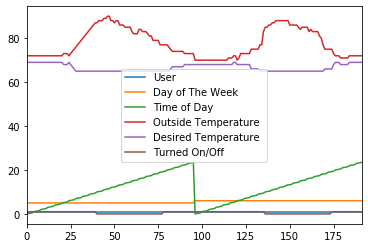

In [9]:
temperaturedata.plot()

In [10]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
scaler = MinMaxScaler()

In [12]:
train_scaled =scaler.fit_transform(train_set)

In [13]:
test_scaled=scaler.transform(test_set)

In [14]:
def next_batch(training_data,steps):
    random_start= np.random.randint(0,len(training_data)-steps)
    
    y_batch = np.array(training_data[ran_start:rand_start+steps+1]).reshape(1,steps+1)
    
    return y_batch[:,:-1].reshape(-1,steps,1),y_batch[:,1:].reshape(-1,steps,1)

In [15]:
num_inputs = 1

num_time_steps = 30

num_neurons = 10

num_outputs = 1

learning_rate = 0.001

num_train_iterations =10001

In [16]:
input_layer = tf.placeholder(tf.float32,[None,num_time_steps,num_inputs])

output_layer = tf.placeholder(tf.float32,[None,num_time_steps,num_outputs])

In [20]:
cell = tf.contrib.rnn.OutputProjectionWrapper(
    tf.contrib.rnn.BasicRNNCell(num_units=num_neurons, activation=tf.nn.relu),
    output_size=num_outputs)

In [111]:
outputs, states = tf.nn.dynamic_rnn(cell, input_layer, dtype=tf.float32)

ValueError: in converted code:
    relative to /Users/Apple/opt/anaconda3/envs/tf/lib/python3.7/site-packages/tensorflow:

    contrib/rnn/python/ops/core_rnn_cell.py:378 call
        output, res_state = self._cell(inputs, state)
    python/ops/rnn_cell_impl.py:385 __call__
        self, inputs, state, scope=scope, *args, **kwargs)
    python/layers/base.py:537 __call__
        outputs = super(Layer, self).__call__(inputs, *args, **kwargs)
    python/keras/engine/base_layer.py:591 __call__
        self._maybe_build(inputs)
    python/keras/engine/base_layer.py:1881 _maybe_build
        self.build(input_shapes)
    python/keras/utils/tf_utils.py:295 wrapper
        output_shape = fn(instance, input_shape)
    python/ops/rnn_cell_impl.py:455 build
        shape=[input_depth + self._num_units, self._num_units])
    python/keras/engine/base_layer.py:1484 add_variable
        return self.add_weight(*args, **kwargs)
    python/layers/base.py:450 add_weight
        **kwargs)
    python/keras/engine/base_layer.py:384 add_weight
        aggregation=aggregation)
    python/training/tracking/base.py:663 _add_variable_with_custom_getter
        **kwargs_for_getter)
    python/ops/variable_scope.py:1496 get_variable
        aggregation=aggregation)
    python/ops/variable_scope.py:1239 get_variable
        aggregation=aggregation)
    python/ops/variable_scope.py:545 get_variable
        return custom_getter(**custom_getter_kwargs)
    python/ops/rnn_cell_impl.py:251 _rnn_get_variable
        variable = getter(*args, **kwargs)
    python/ops/variable_scope.py:514 _true_getter
        aggregation=aggregation)
    python/ops/variable_scope.py:864 _get_single_variable
        (err_msg, "".join(traceback.format_list(tb))))

    ValueError: Variable rnn/output_projection_wrapper/basic_rnn_cell/kernel already exists, disallowed. Did you mean to set reuse=True or reuse=tf.AUTO_REUSE in VarScope? Originally defined at:
    
      File "/Users/Apple/opt/anaconda3/envs/tf/lib/python3.7/site-packages/tensorflow/contrib/rnn/python/ops/core_rnn_cell.py", line 378, in call
        output, res_state = self._cell(inputs, state)
      File "<ipython-input-92-dc689e642284>", line 1, in <module>
        outputs, states = tf.nn.dynamic_rnn(cell, input_layer, dtype=tf.float32)
      File "/Users/Apple/opt/anaconda3/envs/tf/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3326, in run_code
        exec(code_obj, self.user_global_ns, self.user_ns)
      File "/Users/Apple/opt/anaconda3/envs/tf/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3249, in run_ast_nodes
        if (await self.run_code(code, result,  async_=asy)):
      File "/Users/Apple/opt/anaconda3/envs/tf/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3058, in run_cell_async
        interactivity=interactivity, compiler=compiler, result=result)
    
